# Week 9
# Plotting with Matplotlib
1. Create subplots
2. Adjust ticks, legends, labels
3. Add annotations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Download Bitcoin trading data
import json
import requests
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
BTC = pd.DataFrame(json.loads(res.content)['Data'])

# Use time as index
BTC = BTC.set_index('time')
BTC.index = pd.to_datetime(BTC.index, unit='s')

BTC.tail(3)# 

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2023-03-20,28534.79,27229.43,28037.32,65776.48,1.837053e+09,27807.29,direct,
2023-03-21,28498.09,27411.61,27807.29,47709.66,1.338966e+09,28185.99,direct,
2023-03-22,28790.72,28038.89,28185.99,32956.53,9.357446e+08,28583.54,direct,


In [4]:
# Install yahoo finance library
!pip install --upgrade pip
!pip install yfinance

     ---------------------------------------- 2.1/2.1 MB 16.4 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\ch002\anaconda3\python.exe -m pip install --upgrade pip


     ---------------------------------------- 59.3/59.3 kB 3.3 MB/s eta 0:00:00
     ------------------------------------- 499.4/499.4 kB 15.8 MB/s eta 0:00:00
     ---------------------------------------- 112.2/112.2 kB ? eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


In [9]:
import yfinance as yf

SPY = yf.download('SPY', start="2017-09-29")
SPY.tail(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-20,390.799988,394.170013,390.070007,393.739990,393.739990,93055800
2023-03-21,397.239990,399.410004,395.579987,398.910004,398.910004,91306400
2023-03-22,398.730011,399.880005,398.089996,398.339996,398.339996,21852475


## 1. Four plots on the price change
- Scatter plot
- Histogram

Text(0.5, 1.0, 'S&P 500 Index')

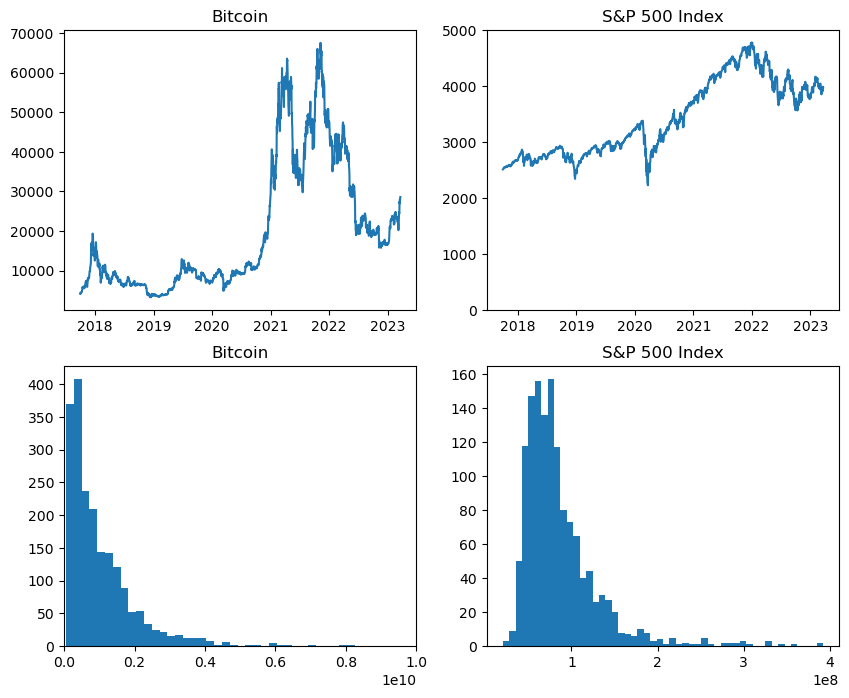

In [22]:
fig = plt.figure(figsize=(10, 8))

# Add axes for the first subplot
ax1 = fig.add_subplot(2, 2, 1) # What do these numbers mean?
                               # (number of rows, number of columns, the index of this particular plot)

# plot BTC price change (close price vs. time)
ax1.plot(BTC.index, BTC['close'])
ax1.set_title("Bitcoin")

# Add axes for the second subplot
ax2 = fig.add_subplot(2, 2, 2)

# plot SPY price change (close price vs. time)
ax2.plot(SPY.index, SPY['Close'] * 10)
ax2.set_title("S&P 500 Index")
ax2.set_ylim([0, 5000])

# The third subplot
ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(BTC['volumeto'], bins=50)
ax3.set_title("Bitcoin")
ax3.set_xlim([0, 1e10])

# The fourth subplot
ax4 = fig.add_subplot(2, 2, 4)
ax4.hist(SPY['Volume'], bins=50)
ax4.set_title("S&P 500 Index")
# ax4.set_xlim([0, 1e10])

## 2 Ticks, labels, and legends

(2500.0, 15000.0)

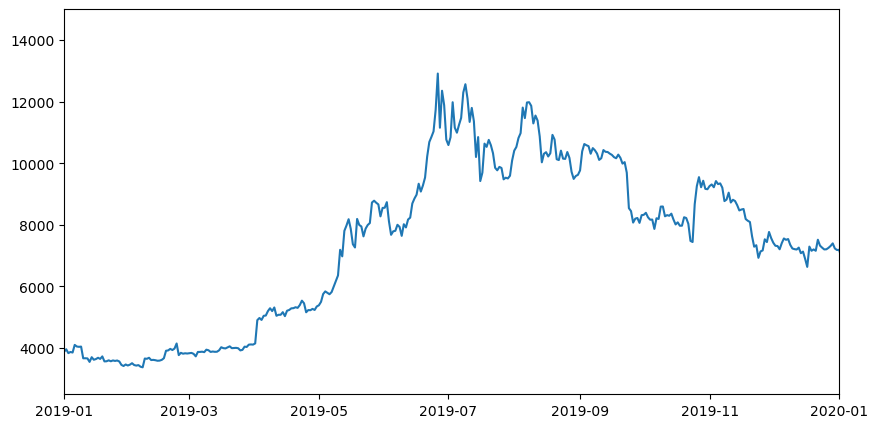

In [23]:
# Specify limits on the x-axis and y-axis
from datetime import datetime

plt.figure(figsize=(10, 5))
plt.plot(BTC.index, BTC['close'])
plt.xlim([datetime(2019, 1, 1), datetime(2020, 1, 1)])
plt.ylim([2500, 15000])

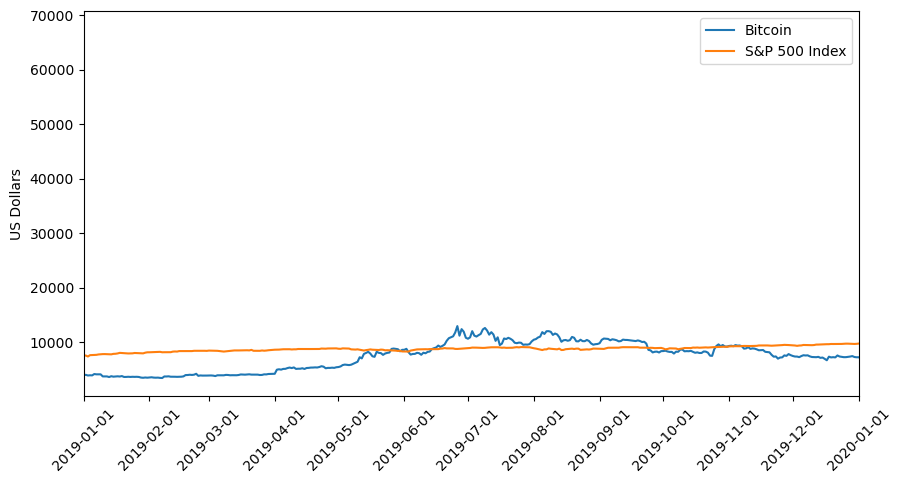

In [25]:
# Show ticks for every month
plt.figure(figsize=(10, 5))
plt.plot(BTC.index, BTC['close'])
plt.plot(SPY.index, SPY['Close'] * 30)
plt.xlim([datetime(2019, 1, 1), datetime(2020, 1, 1)])
ticks = [datetime(2019, x, 1) for x in range(1, 13)]
ticks.append(datetime(2020, 1, 1))
plt.xticks(ticks, rotation=45)

# Add y label
plt.ylabel("US Dollars")

# Add legned
plt.legend(['Bitcoin', 'S&P 500 Index'])

plt.show()

## 3. Add Annotations

Text(2018-04-11 00:00:00, 20000, 'Peak value: 19000')

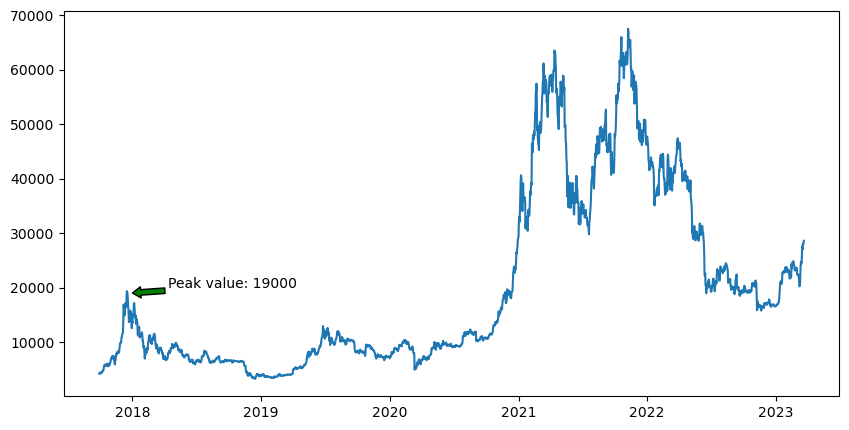

In [32]:
from datetime import timedelta

plt.figure(figsize=(10, 5))
plt.plot(BTC.index, BTC['close'])

# Point out the peak value
plt.annotate('Peak value: 19000',
             xy=(datetime(2018, 1, 1), 19000),
             xytext=(datetime(2018, 1, 1)+timedelta(days=100), 20000),
             arrowprops=dict(facecolor='green', headwidth=8, width=4, headlength=6))

# # Highlight the dramatic increase in 2018
# rectangle = plt.Rectangle((datetime(2017, 5, 1), 2500),
#                           timedelta(days=200),
#                           17500,
#                           color='k',
#                           alpha=0.3)
# plt.gca().add_patch(rectangle)

# # Add text description
# plt.text(datetime(2017, 5, 1),
#          1500,
#          "Bitcoin price increased 5 times within 200 days",
#          fontsize=12)